In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy
import arviz as az

# Importing data and visualisation

[1. 2. 3. 4. 5. 6.]


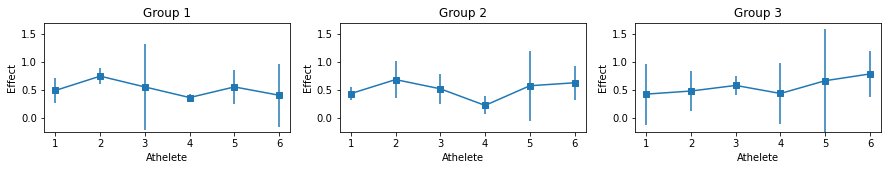

In [18]:
# three groups went for the training



p1 = np.loadtxt('group_1_normalised.txt')
p2 = np.loadtxt('group_2_normalised.txt')
p3 = np.loadtxt('group_3_normalised.txt')

p1 = p1.reshape(-1,1)
p2 = p2.reshape(-1,1)
p3 = p3.reshape(-1,1)

# effect of training was measured in all the groups - plotting just to visualise

effect = np.concatenate((p1,p2,p3),axis=1)
mean_effect = np.mean(effect,axis=1)
std_effect = np.std(effect,axis=1)


effect_group_1 = mean_effect[0:6]
effect_group_2 = mean_effect[6:12]
effect_group_3 = mean_effect[12:18]
x = np.linspace(1,6,6)
print(x)

# plotting
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,2))

ax1.errorbar(x, effect_group_1, 1.95*std_effect[0:6],marker = 's')
ax1.set_ylabel('Effect')
ax1.set_xlabel('Athelete')
ax1.set_title('Group 1')
ax1.set_ylim(-0.25,1.7)

ax2.errorbar(x, effect_group_2, 1.95*std_effect[6:12],marker = 's')
ax2.set_ylabel('Effect')
ax2.set_xlabel('Athelete')
ax2.set_title('Group 2')
ax2.set_ylim(-0.25,1.7)

ax3.errorbar(x, effect_group_3, 1.95*std_effect[12:18],marker = 's')
ax3.set_ylabel('Effect')
ax3.set_xlabel('Athelete')
ax3.set_title('Group 3')
ax3.set_ylim(-0.25,1.7)

plt.show()





# Bayesian Hierarchical Modelling for each group

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Individual_Std, Individual_Effect, Prior_Sigma, Overall_Std, Overall_Effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 44 seconds.
There were 1400 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7014036396093267, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1638 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6330311994229865, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-19-0b73c4fae9c9>:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_h)
/Users/tc489/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3`

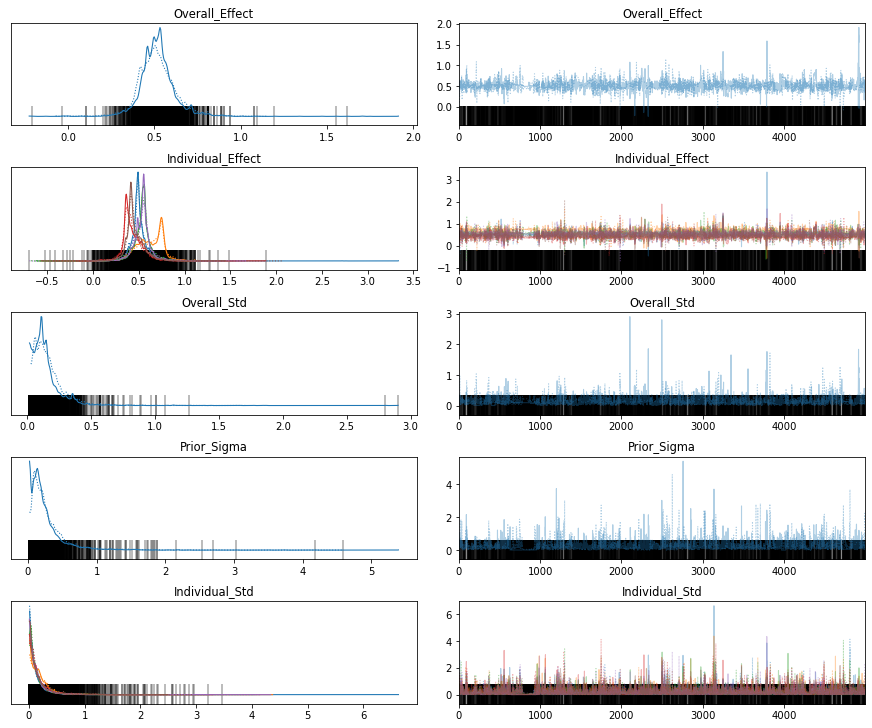

0.516174922353643 0.10932130606373715
(6, 2)


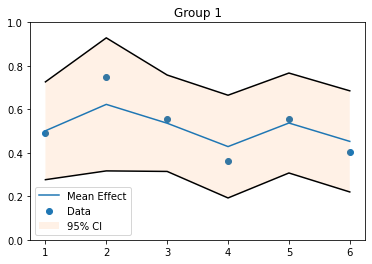

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Individual_Std, Individual_Effect, Prior_Sigma, Overall_Std, Overall_Effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 28 seconds.
There were 1774 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5863917835324736, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1534 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.670763188521733, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-19-0b73c4fae9c9>:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_h)
/Users/tc489/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` 

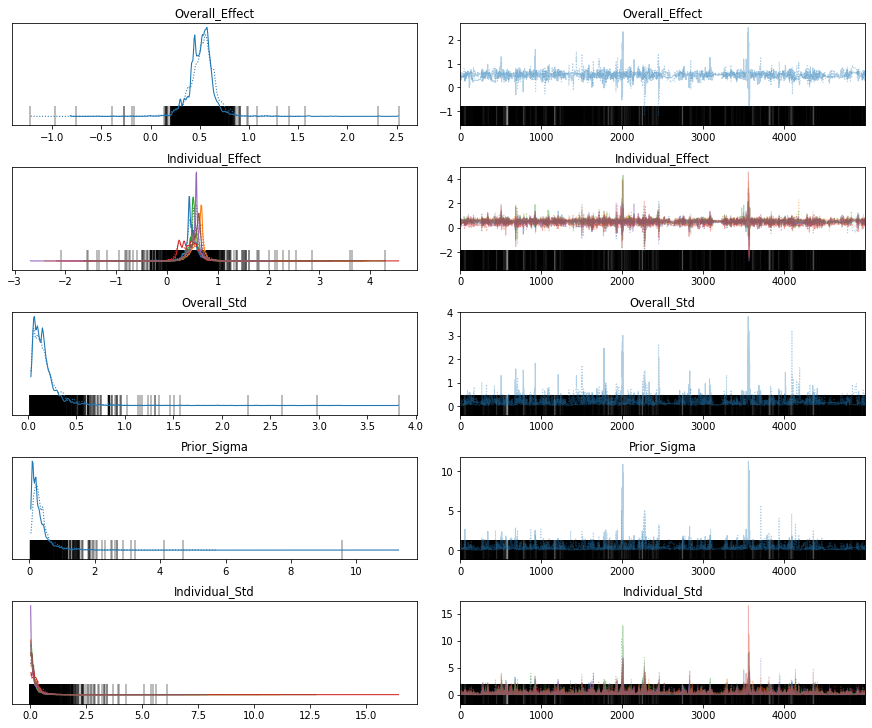

0.5188360293262321 0.1548497277496522
(6, 2)


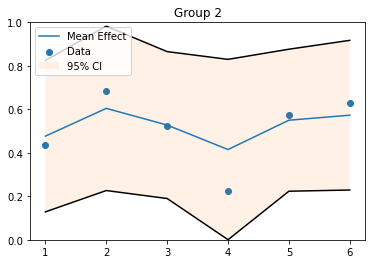

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Individual_Std, Individual_Effect, Prior_Sigma, Overall_Std, Overall_Effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 27 seconds.
There were 2366 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.441963788543428, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1502 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6815643882383164, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-19-0b73c4fae9c9>:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_h)
/Users/t

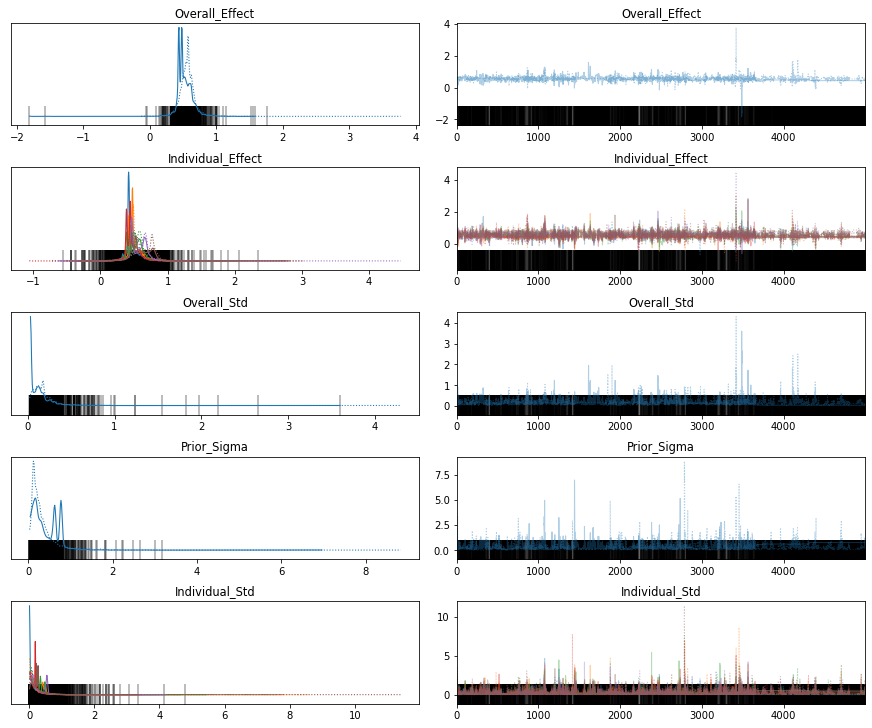

0.5404956890735015 0.13699820508303462
(6, 2)


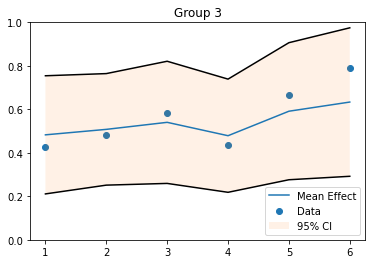

In [19]:
# Bayesian hierarchical Modelling for each group

for i in range(0,3):
    if i==0:
        data = effect_group_1
    elif i==1:
        data = effect_group_2
    elif i==2:
        data = effect_group_3
        
    base_model = pm.Model()

    with base_model:
        mu_m = pm.Normal('Overall_Effect',0,100)
        sigma_m= pm.HalfNormal('Overall_Std',100)
        sigma_s = pm.HalfNormal('Prior_Sigma',100)
    
        mean_data = pm.Normal('Individual_Effect',mu = mu_m,sd = sigma_m,shape=6)
        std_data = pm.HalfNormal('Individual_Std',sigma_s,shape=6)
    
        likelihood = pm.Normal('y',mu = mean_data,sd = std_data,observed = data)
        trace_h = pm.sample(5000,return_inferencedata=False)
    
    pm.traceplot(trace_h)
    plt.show()

    mean_h = trace_h['Individual_Effect'].mean(0)
    std_h = trace_h['Individual_Effect'].std(0)

    p1 = scipy.stats.norm.interval(0.95,mean_h,std_h)
    p1 = np.array(p1)

    y_low_h = p1[0,:]
    y_up_h = p1[1,:]


    mean_overall = trace_h['Overall_Effect'].mean(0)
    std_overall = trace_h['Overall_Effect'].std(0)

    print(mean_overall,std_overall)

    result_overall_group =[mean_overall,std_overall]
    mean_h = mean_h.reshape(-1,1)
    std_h = std_h.reshape(-1,1)
    result_individual_group =np.concatenate((mean_h,std_h),axis=1)
    print(result_individual_group.shape)
    
    if i==0:
        np.savetxt('result_overall_group_1.txt',result_overall_group)
        np.savetxt('result_individual_group_1.txt',result_individual_group)
    elif i==1:
        np.savetxt('result_overall_group_2.txt',result_overall_group)
        np.savetxt('result_individual_group_2.txt',result_individual_group)
    elif i==2:
        np.savetxt('result_overall_group_3.txt',result_overall_group)
        np.savetxt('result_individual_group_3.txt',result_individual_group)

    

    
    plt.scatter(x,data,label = 'Data')
    plt.plot(x,mean_h,label = 'Mean Effect')
    plt.plot(x,y_low_h,'black')
    plt.plot(x,y_up_h,'black')
    plt.fill_between(x,np.ravel(y_low_h),np.ravel(y_up_h),alpha=0.1,label = '95% CI')
    plt.ylim([0,1])
    plt.legend()
    if i==0:
        plt.title('Group 1')
    elif i==1:
        plt.title('Group 2')
    elif i==2:
        plt.title('Group 3')
    plt.show()